# Perceptron

This notebook uses a single perceptron to classify digits from the mnist hand written digit dataset.

A perceptron is one of the simplest building blocks of neural networks. In combination with additional perceptrons and multiple layers they allow us to construct deep learning models.

A perceptron takes a weighted sum of inputs and passes them through an activation function. This function can really be anything, so for example, the identity function $f(x)=x$ just returns the weighted sum of inputs. In this notebook the perceptron's activation function will be the sign function, which will return either a -1 or a 1 depending on whether the value of the weighted sum of inputs is greater or less than or equal to zero. In neural networks, perceptrons commonly use non-linear activation functions, but that is beyond the scope of this notebook.

## How the perceptron works

Perceptrons work by taking inputs, multiplying each input value by a weight, adding a bias (just an extra weight) and passing that value through the activation function. The output of the activation function is compared to the desired output, and if necessary the weights are updated by the perceptron learning rule. This continues until the weights converge or the training is stopped. With a trained perceptron we can pass data into it and receive a classification as output.


## The algorithm

- Randomly initialize weights
- Send the weighted sum of inputs (a flattened image in this notebook) through the perceptron, also known as the forward pass
- Perform a backward pass where
    - If the predicted output matches the desired output do nothing
    - If the predicted output differs from the desired output, update the weights using the perceptron learning rule
- Repeat until convergence or max interations

It should be noted that if the data is not linearly separable the perceptron will never converge.

## Perceptron Learning Rule

The perceptron learning rule is very simple. It basically states that if the output is not what was desired, add a portion of the input to the weight and iterate until the desired outputs are obtained.

$W_{n+1} = W_n + \eta(y-\hat{y})$

$\eta$ is the learning rate, or the portion of the input to the weights.

$y$ is the desired output (the label)

$\hat{y}$ is the predicted output

## Measuring performance

The mean squared error is sufficient to measure performance for a single perceptron, but there are plenty of other methods available as well. The $MSE$ is written as $MSE = \frac{1}{2n}\sum_{i=1}^n(y-\hat{y})^2$. The $2n$ term is optional and can just be $n$, however when working with neural networks the 2 is frequently seen as it simplifies the derivation and does not impact the result.

---
## Notes on this notebook
- The data contains images in the form of arrays and labels in the form of the digit the image represents
- Each image is flattened then sent through the perceptron
- The perceptron performs a binary classification task, either the image is correct (1) or wrong (-1)
- The perceptron learning rule is used to update the weights
- After enough iterations the model is able to successfully classify more images than it misclassifies (this isn't the best way to classify images, its a demo of how the perceptron can be used)
- This notebook vectorizes the entire operation so instead of updating after each classification it updates after the entire training dataset has been passed through

The steps for this model are as follows:
1. Initialize the weights
 - We need a weight for every input plus a bias term
 - There are multiple ways to add the bias term, my prefered method is to just add it to the weighted sum of the inputs
 - ex: $WTX + b$ where $W$ is the weight vector, $X$ is the inputs, and $b$ is the bias term
 - Some people will add a 1 to the first element of the inputs and a weight for all inputs including this 1 value. The weight corresponding to the 1 is the bias term in this case.
2. Send the inputs through the perceptron
 - The perceptron takes the inner product of the inputs and weights with the added bias
 - ex: $W^TX+b$ or $b + \sum_{i=1}^N w_i^Tx_i$ depending on how you like to write these things
3. The output is then put through the Sign function (slightly modified to only output -1 or 1)
 - The sign function takes a number and outputs a -1 when the input is < 0, or a 1 when the input is > 0
 - $sgn(z) = \begin{cases}
   > 0 & 1\\    
   \leq 0 & -1   
\end{cases}$
4.  The label for the image (desired value) is then compared with the output and the weights are updated as necessary

## The algorithm

- Randomly initialize weights $W$ as a column vector
    - There will be a weight for every input
    - The dimensions of $W$ will be $nx1$ where $n$ is the number of input values from $X$
    - $W$'s values must be small to avoid issues during training, so $0 \leq w_i \leq 1$ for all values in $W$
- Randomly initialize the bias $b$
    - There will be a single bias for the perceptron
    - Just like with $W$ above, $b$ is a weight and should satisfy $0 \leq b \leq 1$
    - See notes below on initializing weights and bias
- Send the weighted sum of inputs $X$ (a flattened image as a column vector) through the perceptron, also known as the forward pass
    - The weighted sum $Z = W^TX+b$
    - Or or $Z = b + \sum_{i=1}^N w_i^Tx_i$ depending on how you like to write these things
    - The dimensions will be $Z_{1x1} = W_{1xn}^TX_{nx1}+b_{1x1}$
- The output $\hat{y}$ will be the weighted sum passed through the activation function $sign(Z)$
    - $\hat{y} = sign(Z) = \begin{cases}
   > 0 & 1\\    
   \leq 0 & -1   
\end{cases}$
- Perform a backward pass where we apply the perceptron learning rule to update the weights and bias
    - $W_{n+1} = W_n + x_i\eta(y_i-\hat{y_i})$
    - $b_{n+1} = b_n + (y_i-\hat{y_i})$
    - If the predicted output matches the desired output do nothing
    - ex: ($\eta$ = 0.1)
        - $W_{n+1} = W_n + (x_i * 0.1(1-1)) = W_n + (x_i * 0.1 * 0) = W_n$
        - $b_{n+1} = b_n + 0.1*(1-1) = b_n + (0.1*0) = b_n$
    - If the predicted output differs from the desired output, update the weights using the perceptron learning rule
    - ex: $W_{n+1} = W_n + (x_i * 0.1(1--1)) = W_n + (x_i * 0.1 * 2) = W_n + 0.2x_i$
    - ex: $b_{n+1} = b_n + 0.1(1--1) = b_n + (0.1 * 2) = b_n + 0.2$
- Repeat until convergence or max interations

## Adaptive learning rate: Momentum

Learning rates $\eta$ are a crucial hyperparameter for successfully training perceptrons and neural networks. Choose too small of a learning rate and the model may not learn fast enough or at all. Too large of a learning rate leads to overshooting the minimum and exploding gradients. Adaptive learning rates handle this by starting with larger learning rates and then reducing the learning rate as the model improves.

There are multiple ways to achieve this, but the one used in this notebook is defined as 

$$\Delta W{ij}(n) = -\eta \sum_{\psi = 0}^n \alpha^{n-\psi} \frac{\partial E(\psi)}{\partial W_{ij}(\psi)} = \eta \sum_{\psi = 0}^n \alpha^{n-\psi} \delta_j(\psi)y_i(\psi) $$

Where:
- $\eta$ is the learning rate
- $\alpha$ is the momentum term ($0 < \alpha \leq 1$ and usually something close to 1, in this notebook 0.99)
- $\psi$ is the previous weight update

To make this work we need to keep the $\psi$ previous weights. The equation above can seem daunting, so here we'll show a simpler version for $\psi = 1$ and then $\psi = 2$ and this should help clear up and questions.

$\delta_j(n)y_i(n)$ is the update for the weights
- $\delta_j(n)y_i(n) = \frac{X}{n}(y-\hat{y})$

#### $\psi = 1$
$\Delta W{ij}(n) = \alpha \Delta W{ij}(n-1) + \eta\delta_j(n)y_i(n)$

We multiply the previous weights by the momentum term and then add the usual weight update to get our next weight $W_{n+1}$

#### $\psi = 2$
$\Delta W{ij}(n) = \alpha (\alpha \Delta W{ij}(n-2) + \Delta W{ij}(n-1)) + \eta\delta_j(n)y_i(n)) = \alpha^2 \Delta W{ij}(n-2) + \alpha \Delta W{ij}(n-1) + \eta\delta_j(n)y_i(n)$

#### $\psi = 3$
$\Delta W{ij}(n) = \alpha (\alpha^2 \Delta W{ij}(n-3) + \alpha \Delta W{ij}(n-2) + \alpha^2 \Delta W{ij}(n-1)) + \eta\delta_j(n)y_i(n))$

$\Delta W{ij}(n) = \alpha^3 \Delta W{ij}(n-3) + \alpha^2 \Delta W{ij}(n-2) + \alpha\Delta W{ij}(n-1) + \eta\delta_j(n)y_i(n)$

This should help clarify what's happening in the adaptive learning rate.

## Notes
### Notes on initializing weights and bias

- There must be a weight for every input as well as a bias term
- The bias term is simply an additional weight
- There two ways this is typically done, this notebook will use the first approach

First approach:
- Create a weight for every input and store them in a column vector $W$
- Create an additional weight $b$ and store it by itself
- When multiplying the inputs by the weights simply add the bias as the end
    - ex: $Z = W^TX+b$
    
Second approach:
- Insert the value $1$ to the first input of $X$
- This will be multiplied by the bias term and is the same concept as adding the bias term to $W^TX$
    - ex: $X= [0.25, 0.3]$
    - Insert a 1 into the first postition of $X$'s values so that the length of the dimensions of $X$ go from $n$ to $n+1$
    - $X= [1, 0.25, 0.3]$
    - Now when we compute $W^TX$ the first value of $W$ is the bias term and it is always multiplied by 1
    - When we update the weights and bias we must be careful to update $b$ differently than $W$, which is why I prefer to keep the two separate
    
### Why do we need a bias term?

Think of a graph of a line $y=mx+b$. This is what the perceptron is learning. If we only had $y=mx$ our plot would always cross the origin. By adding the $y$ intercept $b$ (or bias to use machine learning terms) we are able to move the plot off the origin if need be.

### Notes on vectorization

Vectorization allows us to compute multiple things at once. It's faster than looping over each item in an array. This notebook makes use of it, and because of that the math shown above differs slightly from whats in the code, namely the backpropogation.

Using a vectorized method to backpropogate and update the weights changes the math to the following:

Passing a single observation (an image in this case) $x_i$ through the perceptron at a time:
- $W_{n+1} = W_n + x_i\eta(y_i-\hat{y_i})$
- $b_{n+1} = b_n + (y_i-\hat{y_i})$

Passing more than one observation through the perceptron at a time:
- $W_{n+1} = W_n + \frac{X}{n}\eta(Y-\hat{Y})$
- $b_{n+1} = b_n + \frac{1}{n}(Y-\hat{Y})$
- Where $n$ is the number of observations
- Technically this notation is also correct for a single observation since $n$ would be $1$, but adding that step is unecessary because dividing by 1 adds nothing to output

## Complexity

The perceptron, if it converges, and it will not if the data is not linearly separable, is linear in both time and space complexity.

## Data

This dataset is pretty common, it's possible to search for and download from many locations. This notebook uses the version found [here](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/) (https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/).

## Classification Problem

Design and train a single-layer perceptron that can detect the digit '0'. The perceptron should return +1 when the digit in the image is '0' and -1 otherwise. Train the perceptron with 5000 images available in 'train' and test the performance of your system by using the other variable, 'test', in the data file. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.cm as cm
import copy
np.random.seed(1)

In [20]:
training_data = pd.read_csv('mnist_train.csv')
testing_data = pd.read_csv('mnist_test.csv')

In [24]:
training_data.shape, testing_data.shape

((60000, 785), (10000, 785))

In [25]:
training_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# organize data
# first column is the label
train_data = training_data.iloc[:,1:].values
test_data = testing_data.iloc[:,1:].values
train_labels = training_data.iloc[:,0].values
test_labels = testing_data.iloc[:,0].values

In [31]:
def show_nums(data, labels, num_img):
    """show random numbers from dataset"""
    indices = np.random.choice(data.shape[0], num_img)
    data = np.array(data.astype('float32')).reshape(data.shape[0], 28,28,1).swapaxes(-3,-2)
    row, col = int(num_img/2), 2     
    fig, axes = plt.subplots(row, col, figsize = (4,num_img))

    i = 0
    for r in range(row):
        for c in range(col):
            if i < num_img:
                imgs_raw = data[indices[i]]
                plt.subplot(row, col, i+1)
                plt.imshow(imgs_raw, cmap=cm.Greys_r)
                plt.title(np.squeeze(labels[indices[i]]))
                i+=1
    plt.tight_layout()
    plt.show

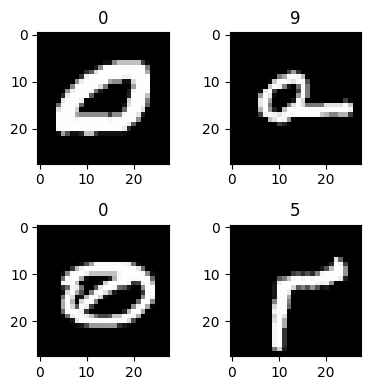

In [32]:
show_nums(train_data, train_labels, 4)

In [8]:
class Perceptron():
    def __init__(self, x, y, **kwargs):
        self.digit = kwargs.get("digit", 0)
        self.epochs = int(kwargs.get("epochs", 1e2))
        self.batch_size = kwargs.get("batch_size", x.shape[0])
        self.adaptive = kwargs.get('momentum', True)
        self.x = x
        self.y = np.where(y == self.digit, 1, -1)
        self.w = np.random.random((self.x.shape[1], 1)) * 0.1
        self.b = np.random.random() * 0.1
        self.dw = {'n-1':np.zeros_like(self.w), 'n-2':np.zeros_like(self.w)}
        self.db = {'n-1':np.zeros_like(self.b), 'n-2':np.zeros_like(self.b)}
        self.train_error = []
        self.alpha = 1
        self.eta = 1e-2
        self.momentum = 0.99
        

    def update_momentum(self, delta_w, delta_b):
        """adaptive learning rate
        params
            delta_w, delta_b: current weight changes
        returns:
            momentum: new momentum value
        """
        w_2 = self.dw['n-1'].copy()
        b_2 = self.db['n-1'].copy()
        self.dw = {'n-1':delta_w, 'n-2':w_2}
        self.db = {'n-1':delta_b, 'n-2':b_2}
        
    
    def forward(self, **kwargs):
        """calculates forward prop"""

        x = kwargs.get('x', self.x)
        self.v = np.dot(x, self.w) + self.b
        self.y_hat = np.where(self.v > 0, 1, -1)

        
    def backward(self, **kwargs):
        """backprop using perceptron learining rule
        w(n+1) = w(n) + eta * (desired-predicted) * input
        """

        x = kwargs.get('x', self.x)
        y = kwargs.get('y', self.y)

        obs = y.shape[0]
        error = y - self.y_hat

        delta_w = sum(error * x).reshape(-1,1) / obs
        delta_b = sum(error) / obs
        
        if self.adaptive:
            momentum_w = self.momentum * (self.momentum * self.dw['n-2'] + self.dw['n-1'])
            momentum_b = self.momentum * (self.momentum * self.db['n-2'] + self.db['n-1'])
            self.update_momentum(delta_w, delta_b)

            self.w += self.eta * (delta_w + momentum_w)
            self.b += self.eta * (delta_b + momentum_b)
        else:
            self.w += self.eta * delta_w
            self.b += self.eta * delta_b

            
    def sd(self, **kwargs):
        """performs steepest descent optimization"""
        
        x = kwargs.get('x', self.x)
        y = kwargs.get('y', self.y)
        
        self.forward(x = x)
        self.backward(x = x, y = y)


    def get_batches(self):
        """creates batches for training
        returns shuffled data
        """
        
        xy = list(zip(self.x, self.y))
        np.random.shuffle(xy)
        x, y = zip(*xy)
        x = np.array(x)
        y = np.array(y)

        return x,y
        
        
    def fit(self):
        """adjusts weights for e epochs
        alternates between making predictions and weight adjustment
        """

        batches = self.x.shape[0] // self.batch_size
        leftover = self.x.shape[0] % self.batch_size
        x, y = self.get_batches()

        for e in range(self.epochs):
            start = 0
            stop = self.batch_size
            for i in range(batches):
                self.sd(x = x[start:stop], 
                        y = y[start:stop])
                self.train_error.append(self.e(x = x[start:stop], 
                                               y = y[start:stop]))
                start += self.batch_size
                stop += self.batch_size
            if leftover != 0:
                self.sd(x = x[-leftover:], 
                        y = y[-leftover:])
                self.train_error.append(self.e(x = x[-leftover:], 
                                               y = y[-leftover:]))


    def predict(self, **kwargs):
        """predits class based on output probability"""
        
        x = kwargs.get('x', self.x)
        
        self.forward(x = x)


    def e(self, **kwargs):
        """computes error
        per assignment this allows you to enter different digits for prediction using the 
        weights trained on another digit to compare performance
        """
        
        x = kwargs.get('x', self.x)
        y = kwargs.get('y', self.y)
        digit = kwargs.get('digit', self.digit)
        
        y = np.where(y == digit, 1, -1)
            
        return np.sum(np.square(y - self.y_hat)) / (2*len(y))


### Helper functions

In [9]:
def train_plot(p):
    """plots error ovr training epochs
    params:
        p: perceptrion instance
    returns:
        None: displays plot
    """
    
    plt.figure(figsize = (4,4))
    plt.plot(p.train_error)
    plt.title(f"Training error for digit {p.digit}")
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    
    return plt.show()

Create an instance of the perceptron class created above, train it and observe the results.

In [10]:
p = Perceptron(train_data, 
               train_labels,
               batch_size = 1000,
               epochs = 1e2)

p.fit()

## Results

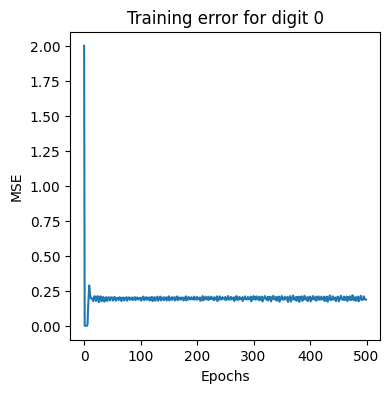

Training error after 100 iterations: 0.186
Test set error: 0.04


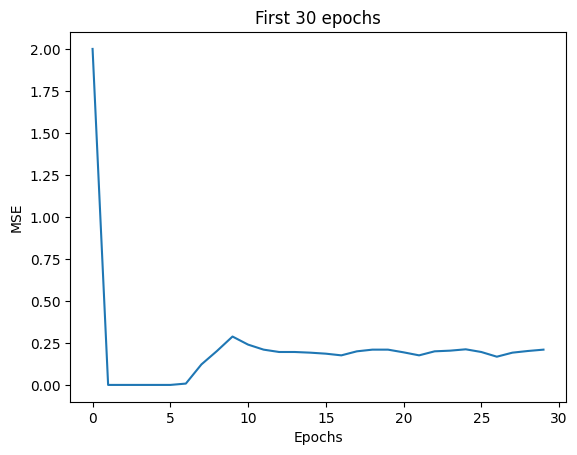

In [11]:
train_plot(p)
print(f"Training error after {p.epochs} iterations: {p.train_error[-1]}")
p.predict(x = test_data)
print(f"Test set error: {p.e(x = test_data, y = test_labels)}")

plt.plot(p.train_error[:30])
plt.title("First 30 epochs")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

### Summary

The perceptron was trained at a learning rate of 0.01 for 5000 epochs, using a momentum of 0.9 on the entire training set each epoch. We can see a steady reduction in error on the training set for first few epochs with a slight increase before settling in to the final training error at 0.186. Running the test set through the model returned an error of 0.04, significantly lower than the training error.

On interesting note, the plot of the training error shows a drop then an increase before it eventually levels out. The dip starts around the 7th epoch. When early stopping was used, the training error is 0.1, which seems much better than the outcome after 5000 epochs, however, the test set error was 0.14. Training the model longer results in a higher training error, but a lower test error.

### Some predictions visualized

We can see that the model correctly labeled 1 true zero. The model correctly classified the remaining digits in this subset as non zero (-1).

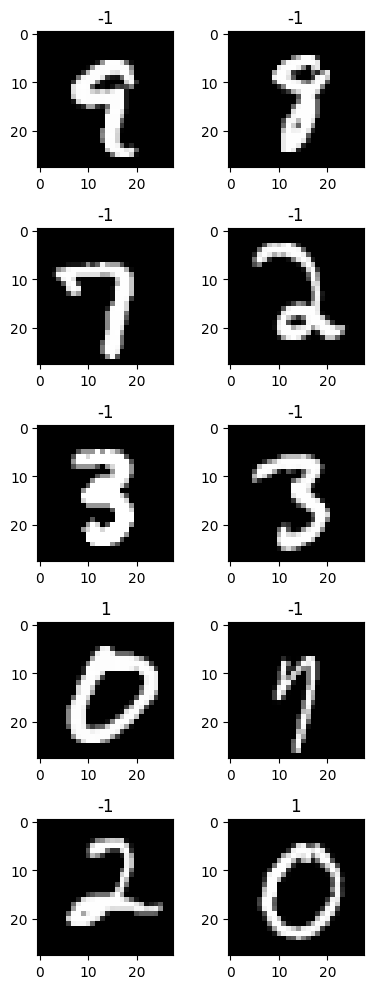

In [17]:
show_nums(test_data, p.y_hat, 10)

We can see a few zeros correctly classified. If you're running this notebook you may need to rerun the cell above several times to see some zeros displayed.

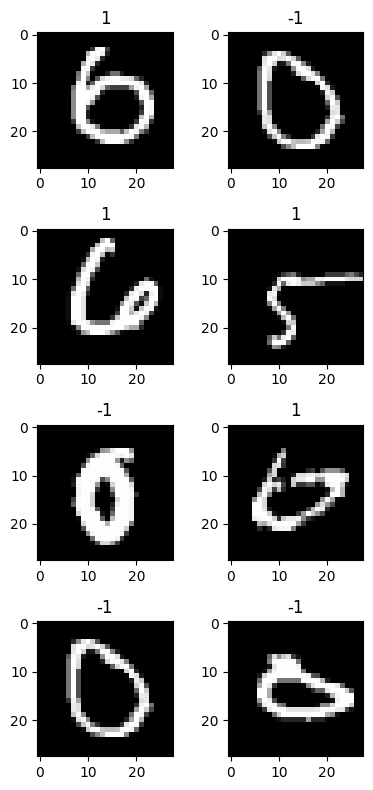

In [18]:
# incorrect predictions
wrongs = []
for i, y in enumerate(test_labels):
    if np.where(y == 0, 1, -1) != p.y_hat[i]:
        wrongs.append(i)

show_nums(test_data[wrongs], p.y_hat[wrongs], 8)

Above we can see some incorrect predictions. In this small sample the model missed some zeros and incorrectly predicted zero for other digits. The model seems struggle with the number 6 when it is written sloppy.

#### *A look at the image of the weights ‘w’ which is a 28 x 28 variable vector*

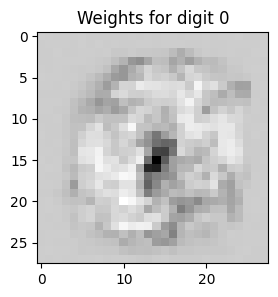

In [19]:
img_w = p.w.reshape(28,28,1).swapaxes(-3,-2)
plt.figure(figsize = (3,3))
plt.imshow(img_w, cmap = cm.Greys_r)
plt.title(f"Weights for digit {p.digit}")
plt.show()

We can see our weight vector, when reshaped to the size of an image, somewhat resembles what it was trying to predict, a '0'.

#### *We'll repeat this experiment, but this time try to detect the other digits with our weights for '0'.*

We aren't expecting this to work, but it will be interesting to see if it does better on digits that somewhat resemble '0', such as '6'.

In [20]:
print("Test set accuracy predicting other digits while using weights learned for digit 0\n")
print("Digit\tTest set accuracy")

for i in range(10):
    e = p.e(y = test_labels, digit = i)
    print(f"{i}\t{e}")

Test set accuracy predicting other digits while using weights learned for digit 0

Digit	Test set accuracy
0	0.04
1	0.422
2	0.394
3	0.38
4	0.386
5	0.34
6	0.328
7	0.368
8	0.348
9	0.354


### Summary

When trying to predict digits other than the one the weights were trained for we see a dramatic increase in error. The digits 1 and 2 had the two highest error rates, likely because they have little in common as far as similar features to the digit 0. On that note, 6 had the lowest error rate of the digits classified using the weights for digit 0. This seems reasonable as the number 6 has a similar shape characteristics to the number 0, such as an oval outer shape.

The weights for any given perceptron are trained based on the supervised feedback for the desired output. Attempting to use the weights for another classification task may not work well if the two categories are not sufficiently similar. However, it appears that when similarities are shared the weights for one classification may be a good starting point for training weights on another category.

---